# Adaptive Linear Neuron Algorithm


**ADAptive LInear NEuron, aka Adaline:**

The key difference between the Adaline rule and the Perceptron is that the weights are updated 
based on a linear activation function rather thean a unity step function like in the perceptron.

In Adaline, this linear activation function $$\phi(z)$$
is simply the identity function of the net input so that $$\phi(w^Tx)=w^Tx$$

In [4]:
import numpy as np

class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    
    Parameters
    -----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Iterations over the training dataset
            **each iteration is called an epoch**
    
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting
    errors_ : list
        Number of misclassifications in every epoch
        
    """
    
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        -----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors,
            where n_samples is the number of samples and
            n_features is the number of featurs
        y : {array-like}, shape = [n_samples]
            Target values.
        
        Returns
        -------
        self : object
        
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            
            self.w_[1:] += self.eta * X.T.dot(errors)
            
            #Here we calculate the gradient based on the whole training dataset,
            #instead of updating the weights after evaluating each individual
            #sample, as in the perceptron.
            self.w_[0] += self.eta * errors.sum()
            
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0] #w_[1:] = w^T
    
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)
    
        

Let's bring in the same Iris data and manipulate it like we did in the Perceptron notebook:

In [16]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0,2]].values

Now we can plot the cost against the number of epochs for the two different learning rates of 0.01 and 0.0001:

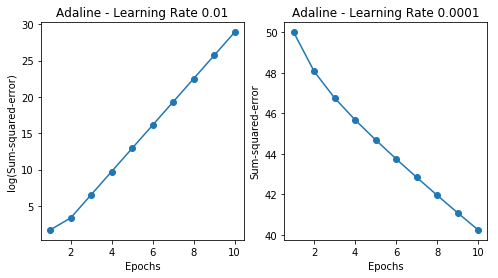

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning Rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning Rate 0.0001')
plt.show()

For these two learning rates, we see the instance where it is soo large (left) and too small (right).

On the left chart, we see that instead of minimzing the cost function, the error becomes larger in every epoch
because it overshoots the global minimum.

Ok the right chart, the learning rate is so small that the algotithm would require a very large number of epochs to converge. 

In order for optimal performance, we need to use feature scaling. In this case, we will be utilizing the scaling method of standardization. 

Standardization can be denoted by the following formula: $$x'_j=\frac{x_j-\mu_j}{\sigma_j}$$

where the mean is represented by: $$\mu_j$$
and the standard deviation is represented by: $$\sigma_j$$


In [14]:
X_std = np.copy(X)
#Standarization via numpy mean and std methods
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

Now that it's standarized, let's go ahead and train Adaline again and see if it converges
at the learning rate of 0.01.

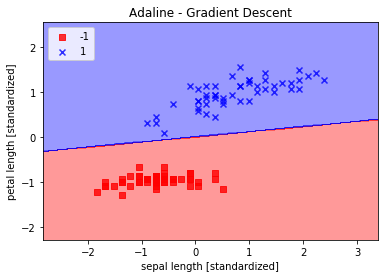

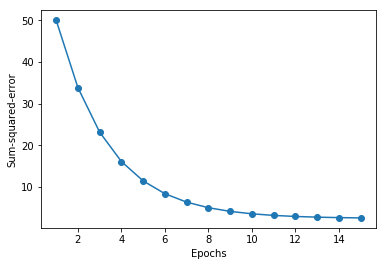

In [18]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)





##Copy and pasted method from Perceptron Learning Algorithm notebook
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    #setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    
    #plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)





plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()


plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

After standardization of the data, we can see that the Adaline now converges after training at
a learning rate of 0.01. However, let's note that the SSE remains non-zero even though all samples
were classified correctly.